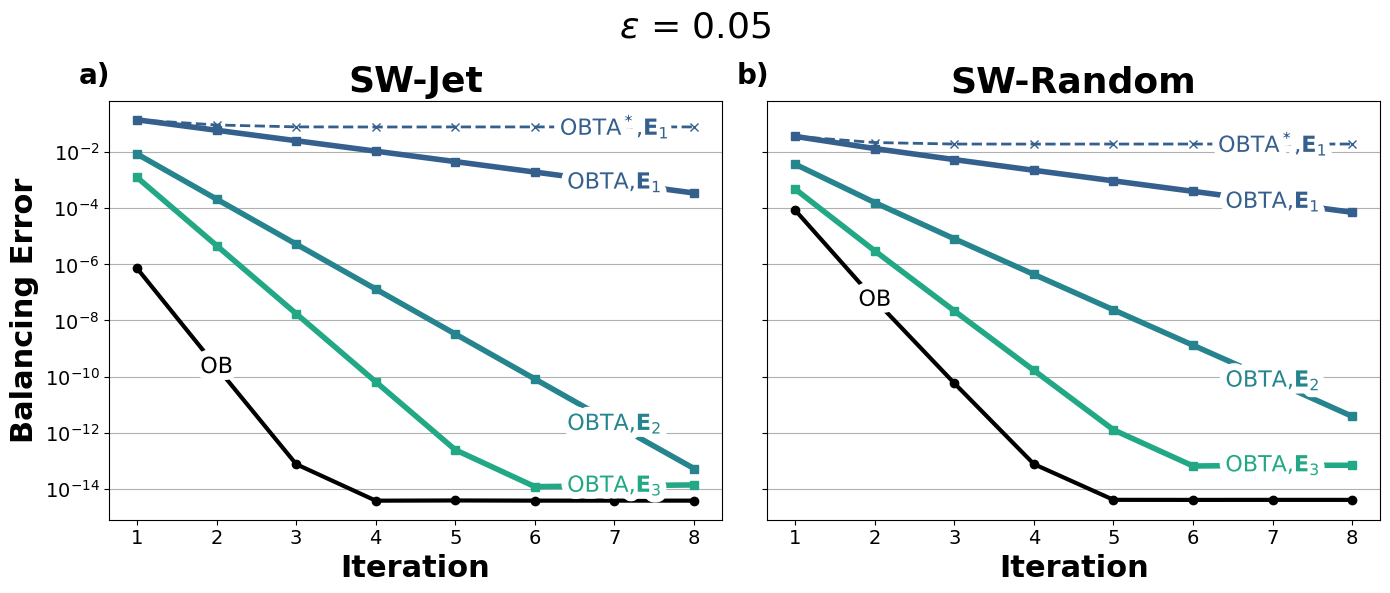

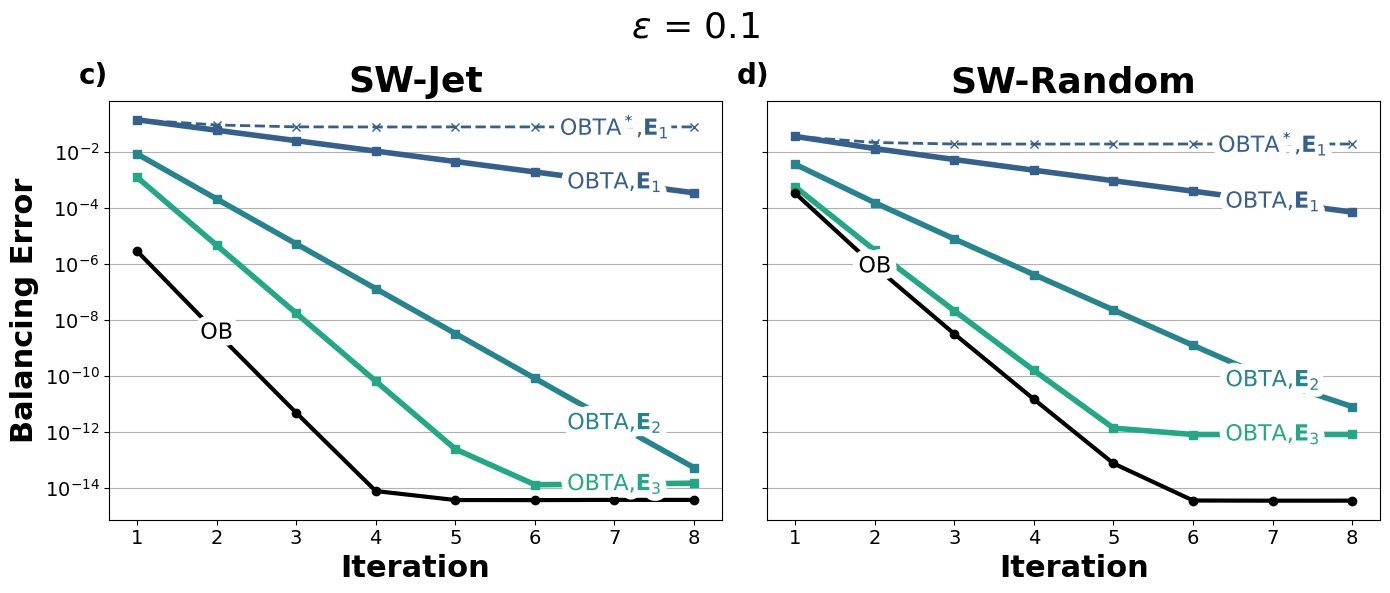

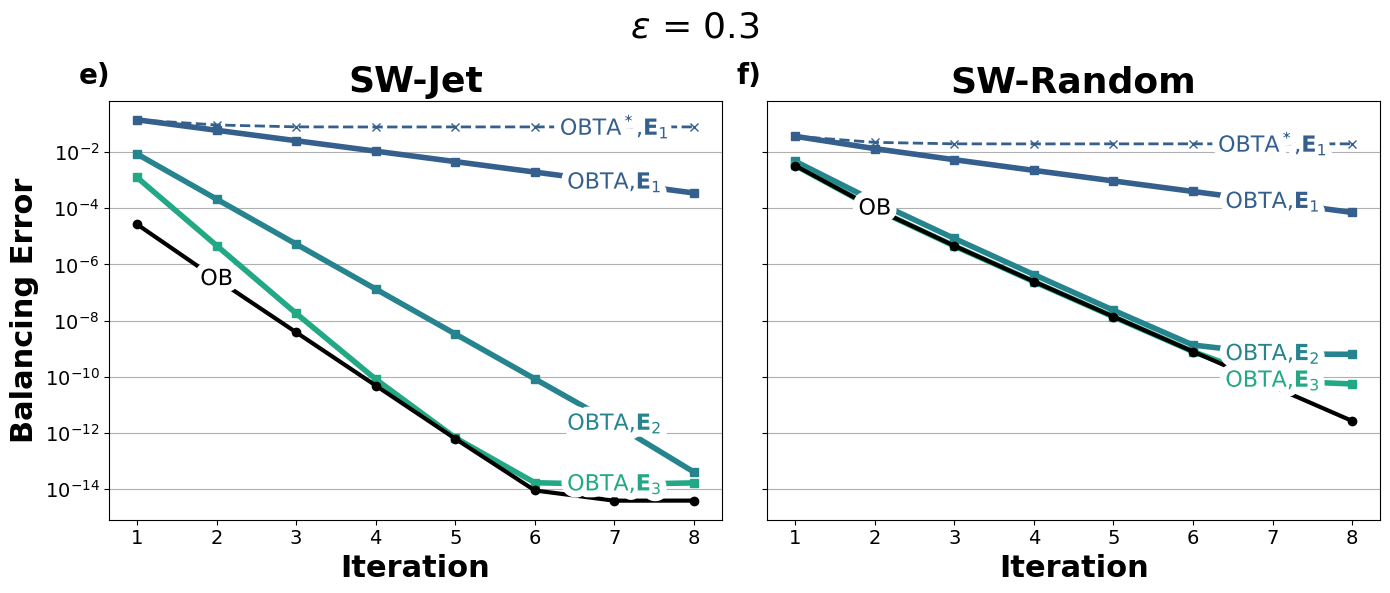

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
from labellines import labelLines
from matplotlib.lines import Line2D

ds = xr.load_dataset("../data/ob_vs_obta.nc", decode_timedelta=False)

colors = plt.cm.viridis_r(np.linspace(0.4, 0.7, len(ds.number_chunks)))[::-1]
labels = iter(["a)", "b)", "c)", "d)", "e)", "f)"])
titles = ["SW-Jet", "SW-Random"]

for ro in ds.rossby_number:
    fig, axs = plt.subplots(1, 2, figsize=(14,6), tight_layout=True, sharey=True)

    for ax, ic, title in zip(axs, ds.initial_condition, titles):
        # OBTA without base point recalculation
        ds.sel({"rossby_number": ro,
                "initial_condition": ic,
                "number_chunks":1,
                "balancing_method": "obta2_5"}).deviation.plot(
                    ax=ax, marker="x", color=colors[0], lw=2, label="OBTA$^*$,$\\mathbf{{E}}_1$",
                    linestyle="--",
                )

        # OBTA with base point recalculation
        for n_chunks, color in zip(ds.number_chunks, colors):
            ds.sel({"rossby_number": ro,
                    "initial_condition": ic,
                    "number_chunks": n_chunks,
                    "balancing_method": "obta"}).deviation.plot(
                        ax=ax, marker="s", color=color, lw=4, label=f"OBTA,$\\mathbf{{E}}_{n_chunks.item()}$",
                    )

        # OB
        ds.sel({"rossby_number": ro,
                "initial_condition": ic,
                "number_chunks":1,
                "balancing_method": "ob"}).deviation.plot(
                    ax=ax, marker="o", color="black", lw=3, label="OB",
                )

        # Create inline labels
        labelLines(ax.get_lines(), zorder=2.5, align=False,
                fontsize=16, outline_width=10, xvals=[7, 7, 7, 7, 2])

        ax.tick_params(labelsize=14)
        ax.set_yscale("log")
        ax.grid(axis="y")
        ax.set_title(title, fontsize=26, fontweight="bold")
        ax.set_xlabel("Iteration", fontsize=22, fontweight="bold")
        ax.set_ylabel("")

        # Create a, b labels
        ax.text(-0.05, 1.04, next(labels), transform=ax.transAxes,
                fontsize=20, fontweight="bold")

    axs[0].set_ylabel("Balancing Error", fontsize=22, fontweight="bold")

    plt.suptitle(r"$\epsilon$" + f" = {ro:.2g}", fontsize=26)

    plt.savefig(f"../figures/ob_vs_obta_ro{ro:.2g}.png", dpi=200)

In [ ]:
# combine the three figures into one (vertical stack)
from PIL import Image

images = [Image.open(f"../figures/ob_vs_obta_ro{ro:.2g}.png") for ro in ds.rossby_number]
widths, heights = zip(*(i.size for i in images))

total_width = max(widths)
total_height = sum(heights)

new_im = Image.new("RGB", (total_width, total_height))

y_offset = 0
for im in images:
    new_im.paste(im, (0, y_offset))
    y_offset += im.size[1]

new_im.save("../figures/ob_vs_obta.png")

: 